In [523]:
import pandas as pd
import os
import numpy as np

import get_votos

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.manifold import TSNE

import chart_studio
import plotly.graph_objs as go
chart_studio.tools.set_credentials_file(username='felipe84zt',api_key='F03ELIAc0CCcvrQ3cdXx')

import altair as alt
alt.renderers.enable('notebook')

from selenium import webdriver
from selenium.webdriver.firefox.options import Options


In [525]:
path='C:/Users/Felipe/Documents/GitHub/IntroDS-Projeto-Final/Data2/'
options_ = Options()
options_.set_preference("browser.download.folderList",2)
options_.set_preference("browser.download.manager.showWhenStarting", False)
options_.set_preference("browser.download.dir",path)
options_.set_preference("browser.helperApps.neverAsk.saveToDisk", "application/pdf")
options_.set_preference("pdfjs.disabled", "true")
browser = webdriver.Firefox(options=options_)

In [690]:
rootPath1=r'C:\Users\Felipe\Documents\GitHub\IntroDS-Projeto-Final\Data3\56-LEG-PRIMEIRA-SESSAO-LEGISLATIVA-Fevereiro19'
rootPath2=r'C:\Users\Felipe\Documents\GitHub\IntroDS-Projeto-Final\Data3\56-LEG-PRIMEIRA-SESSAO-LEGISLATIVA-Março19'
rootPath3=r'C:\Users\Felipe\Documents\GitHub\IntroDS-Projeto-Final\Data3\56-LEG-PRIMEIRA-SESSAO-LEGISLATIVA-Abril19'
rootPath4=r'C:\Users\Felipe\Documents\GitHub\IntroDS-Projeto-Final\Data3\56-LEG-PRIMEIRA-SESSAO-LEGISLATIVA-Maio19'
rootPath5=r'C:\Users\Felipe\Documents\GitHub\IntroDS-Projeto-Final\Data3\56-LEG-PRIMEIRA-SESSAO-LEGISLATIVA-Junho19'
rootPath6=r'C:\Users\Felipe\Documents\GitHub\IntroDS-Projeto-Final\Data3\56-LEG-PRIMEIRA-SESSAO-LEGISLATIVA-Julho19'
rootPath7=r'C:\Users\Felipe\Documents\GitHub\IntroDS-Projeto-Final\Data3\56-LEG-PRIMEIRA-SESSAO-LEGISLATIVA-Agosto19'
rootPath8=r'C:\Users\Felipe\Documents\GitHub\IntroDS-Projeto-Final\Data3\Todos os meses'

arquivo='Abril2019.csv'
arquivo2='Maio2019.csv'

arquivo2='votos2011.csv'

#filename=os.path.join(rootPath,arquivo)
#filename2=os.path.join(rootPath2,arquivo2)

#df_abril=get_votos.votos(rootPath)
#df_maio=get_votos.votos(rootPath2)
#df_marco=get_votos.votos(rootPath3)
#df_junho=get_votos.votos(rootPath4)
#df_julho=get_votos.votos(rootPath5)

vt_todos=get_votos.votos(rootPath8)

In [692]:
vt_todos['Estado'].unique()
#df_pp.to_csv(r'C:\Users\Felipe\Documents\GitHub\IntroDS-Projeto-Final\Site\parlamentares_por_partido.csv')

array(['Roraima', 'Amapá', 'Pará', 'Amazonas', 'Rondonia', 'Acre',
       'Tocantins', 'Maranhão', 'Ceará', 'Piauí', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Mato Grosso', 'Distrito Federal', 'Goiás', 'Mato Grosso do Sul',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul'], dtype=object)

In [682]:
vt_ago[vt_ago['Estado']=='17 Rio de Janeiro']

Empty DataFrame
Columns: [Nome, Partido, Estado, Codigo, CD01O206E008995, CD01O206E008996, CD01O206E008997, CD01O207E008998, CD01O207E008999, CD01O207E009000, CD01O207E009001, CD01O207E009002, CD01O208E009003, CD01O208E009004, CD01O208E009005, CD01O210E009006, CD01O210E009007, CD01O210E009008, CD01O210E009009, CD01O210E009010, CD01O210E009011, CD01O215O009012, CD01O216E009013, CD01O216E009014, CD01O216E009015, CD01O216E009016, CD01O218E009018, CD01O218E009019, CD01O218E009021, CD01O218E009022, CD01O218E009023, CD01O218E009024, CD01O218E009025]
Index: []

[0 rows x 33 columns]

In [681]:
vt_ago['Estado'].iloc[310]='Rio de Janeiro'
#vt_jul['Nome'].iloc[236]='LUIS TIBÉ'
#vt_jul['Partido'].iloc[236]='PTdoB'

In [374]:
def lado_partido(df_mes):
    
    GOVERNO=['PSL','PP','PSD','MDB','PR','PRB','DEM','PSDB','PTB','PMN','PSC','NOVO','PTC','PHS']
    MINORIA=['PDT','AVANTE','Avate','PATRI','PV','PROS','PPS','CIDADANIA','SOLIDARIEDADE','Solidariedade',\
             'PODE','PL','DC','PRP','PATRIOTA','Patriota','Podemos','S.Part.']
    OPOSICAO=['PT','PSOL','PSB','REDE','PCdoB','PPL']
    df_mes['Lado']=0
    for i in range(len(df_mes['Partido'])):
        if df_mes['Partido'].iloc[i] in GOVERNO:
            df_mes['Lado'].iloc[i]='GOVERNO'
        elif df_mes['Partido'].iloc[i] in OPOSICAO:
            df_mes['Lado'].iloc[i]='OPOSIÇÃO'
        elif df_mes['Partido'].iloc[i] in MINORIA:
            df_mes['Lado'].iloc[i]='MINORIA'
        else:
            print(df_mes['Partido'].iloc[i])
            print(i)

In [693]:
lado_partido(vt_todos)

C:\Users\Felipe\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [399]:
def matriz_votos(df_mes):
    
    mat_vts=np.zeros((len(df_mes),len(df_mes.iloc[:,4:-1].columns)))
    num_votes_in_row=np.zeros(len(df_mes))
    
    for linha in range(len(df_mes)):
        num_votes = 0
        votos = df_mes.loc[[linha]].iloc[:,4:-1]
        roll_array = np.zeros(len(votos.columns))
        for idx,vt in enumerate(votos.columns):
        
            if votos[vt].iloc[0]=='Sim':
                roll_array[idx] = 1
                num_votes = num_votes + 1
            elif votos[vt].iloc[0]=='Não':
                roll_array[idx] = -1
                num_votes = num_votes + 1
            elif votos[vt].iloc[0]=='Obstrução':
                roll_array[idx] = -1
                num_votes = num_votes + 1  
            elif votos[vt].iloc[0]=='Abstenção':
                roll_array[idx] = 0
                num_votes = num_votes + 1
            else:
                roll_array[idx] = 0
        num_votes_in_row[linha] = num_votes

        mat_vts[linha] = roll_array
    
    return mat_vts,num_votes_in_row

In [694]:
matriz,arr=matriz_votos(vt_todos)

In [628]:
def tsne_camara(matriz,df_mes):
    
    tsne=TSNE()
    tsne_vt=tsne.fit_transform(matriz)
    df_mes['tsne-1d-one']=tsne_vt[:,0]
    df_mes['tsne-2d-two']=tsne_vt[:,1]

    sns.set(rc={'axes.facecolor':'#e9ecbf', 'figure.facecolor':'#e9ecbf'})
    plt.figure(figsize=(16,10))

    sns.scatterplot(data=df_mes,hue='Lado',x='tsne-1d-one',y='tsne-2d-two',marker='s',\
                    palette=['b','g','r'],sizes=[10])

    leg = plt.legend()
    leg.get_frame().set_alpha(1)
    plt.tick_params(direction='out', length=6, width=2, colors='r',
                   grid_color='r', grid_alpha=0.5)
    
    

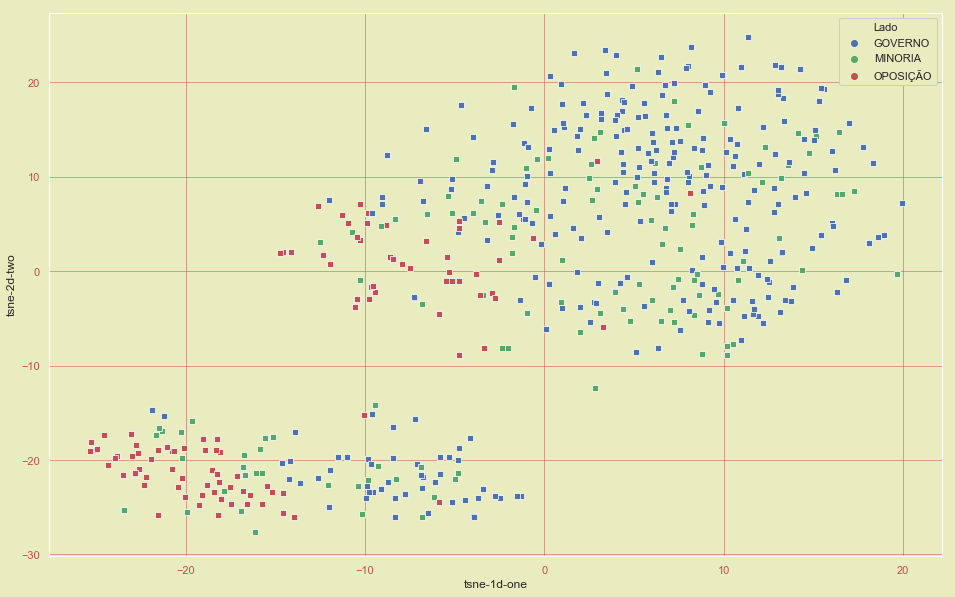

In [695]:
tsne_camara(matriz,vt_todos)

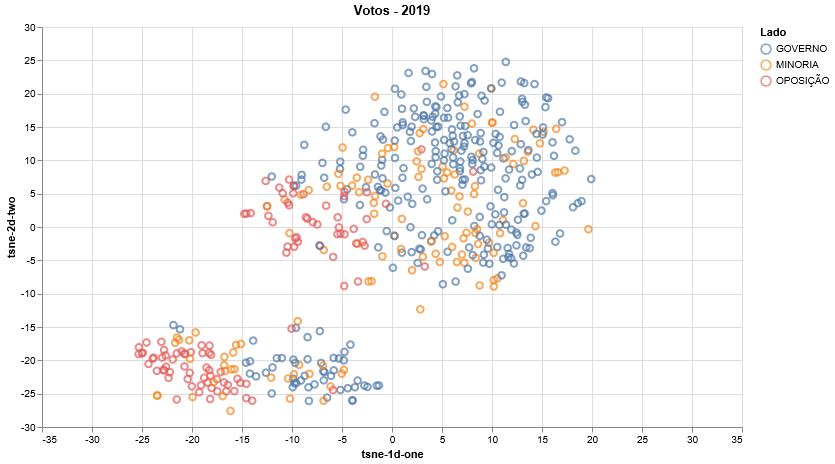

In [696]:
xscale = alt.Scale(domain=(-35, 35))
yscale = alt.Scale(domain=(-30, 30))

chart=alt.Chart(vt_todos,width=700,\
          height=400).mark_point(size=45).encode(alt.X('tsne-1d-one',scale=xscale),\
                                                 alt.Y('tsne-2d-two',scale=yscale),color='Lado',\
                                                 tooltip=['Nome','Partido','Estado']).properties(title='Votos - 2019')

chart.save('chart_todos.html')
chart

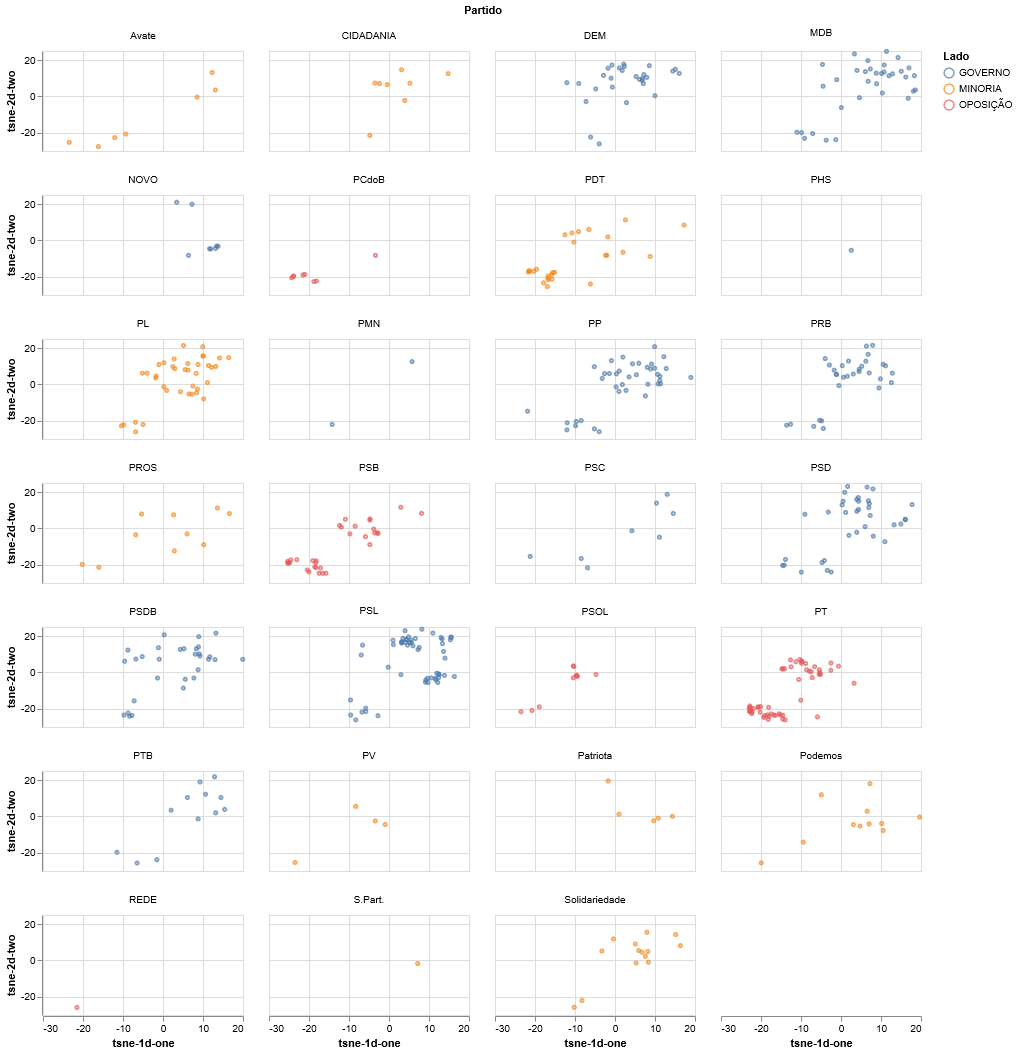

In [697]:

chart_part=alt.Chart(vt_todos,width=250,height=100).mark_point(size=10).encode(x='tsne-1d-one:Q',y='tsne-2d-two:Q'\
                                                                  ,color='Lado:N',\
                             
                                                                  tooltip=['Nome','Partido','Estado'],\
                                                                  facet='Partido:O').properties(columns=4,width=200,height=100)
chart_part.save('chart_part_todos.html')
chart_part

In [698]:
vt_todos.to_csv(r'C:\Users\Felipe\Documents\GitHub\IntroDS-Projeto-Final\Data3\votos_todos.csv',sep=';',index=False)

In [101]:
def rede_est_part(df_pe):
    print('Fase 0')
    deputados = df_pe['Nome']
    pesos= {dep:{ped: 0 for ped in deputados if ped!=dep} for dep in deputados}
    print('Fase 1')
    
    for a in range(len(df_pe)):
        estado1=df_pe['Estado'].iloc[a]
        for b in range(a+1,len(df_pe)):
            estado2=df_pe['Estado'].iloc[b]
            if estado1==estado2:
                pesos[df_pe['Nome'].iloc[a]][df_pe['Nome'].iloc[b]]+=1
    print('Fase 2')
    
    
    for a in range(len(df_pe)):
        estado1=df_pe['Partido'].iloc[a]
        for b in range(a+1,len(df_pe)):
            estado2=df_pe['Partido'].iloc[b]
            if estado1==estado2:
                pesos[df_pe['Nome'].iloc[a]][df_pe['Nome'].iloc[b]]+=1
    
    print('Fase 3')
    g = nx.Graph()
    for par,nome in enumerate(deputados):
        g.add_node(nome)
        if df_pe['Lado'].iloc[par]=='GOVERNO':
            g.node[nome]['color'] ='b'
        elif df_pe['Lado'].iloc[par]=='OPOSIÇÃO':
            g.node[nome]['color'] ='r'
        elif df_pe['Lado'].iloc[par]=='MINORIA':
            g.node[nome]['color'] ='y'
        else:
            g.node[nome]['color'] ='m'
    print('Fase 4')
    for dep1, vizinho in pesos.items():
        for dep2, peso in vizinho.items():
            if peso == 0:
                continue
            g.add_edge(dep1,dep2, weight= peso, difference = 1. / peso)
            
    return g